<a href="https://colab.research.google.com/github/mohdbakheet/H3N2-Data/blob/main/clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#from google.colab import drive
#drive.mount('/Users/mab95097/Downloads/ALL_titer_values_for_H3N2/')
from google.colab import drive
drive.mount('/content/drive')

# After mounting, you can use standard file operations to copy files to "/content/drive/My Drive/"

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
# Creates local webserver and auto handles authentication.
gauth.LocalWebserverAuth()
drive = GoogleDrive(gauth)

upload_file = drive.CreateFile({'title': 'FileName.csv'})
upload_file.SetContentFile('path/to/your/file.csv')
upload_file.Upload()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

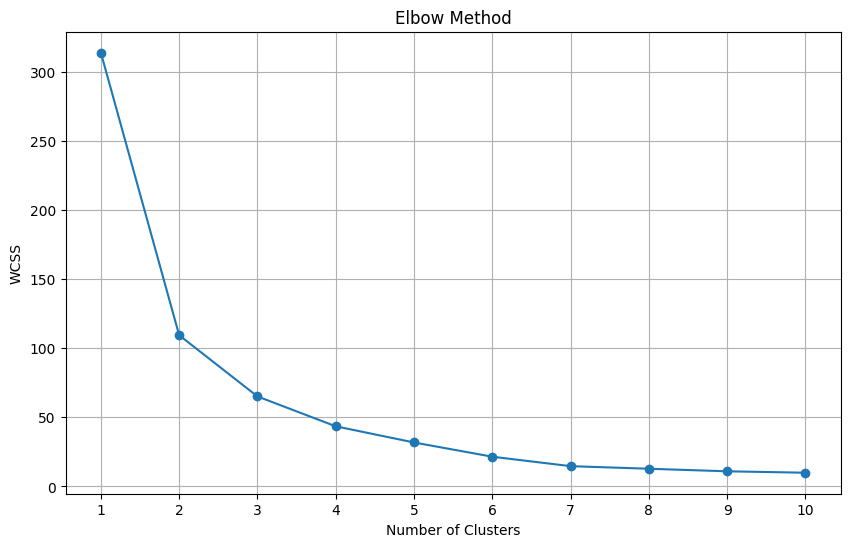

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


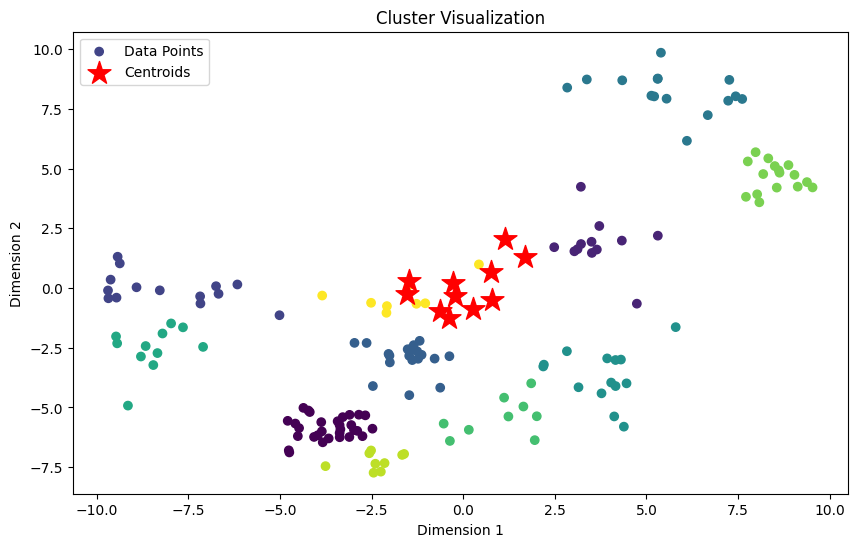

Centroid at:             dim.1     dim.2
Cluster                    
0       -3.663233 -5.863890
1        3.650674  1.843599
2       -8.095423 -0.030763
3       -1.541472 -2.936087
4        5.650372  8.209565
5        3.819349 -3.678593
6       -8.472372 -2.543866
7        1.007696 -5.406037
8        8.518149  4.649978
9       -2.370060 -7.244179
10      -1.734844 -0.360862
Cluster 2 has 14 members.
Cluster 1 has 12 members.
Cluster 3 has 19 members.
Cluster 5 has 14 members.
Cluster 0 has 30 members.
Cluster 9 has 9 members.
Cluster 4 has 15 members.
Cluster 8 has 16 members.
Cluster 7 has 9 members.
Cluster 6 has 11 members.
Cluster 10 has 8 members.

Members of Cluster 0:
       type                name     dim.1     dim.2  Cluster
7   antigen  A/Beijing/352/1989 -4.357423 -5.015868        0
61  antigen    A/Lyon/1149/1991 -4.476097 -5.862198        0
62  antigen    A/Lyon/1182/1991 -4.578640 -5.671921        0
64  antigen   A/Lyon/24222/1991 -4.184150 -5.189786        0
68  antigen

<ipython-input-27-6f133e3df864>:50: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centroid_values = data.groupby('Cluster').mean()


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


data = pd.read_csv('ALL_Influenza-B.csv')

# Scaling
features = data[['dim.1', 'dim.2']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Optimal number of clusters (adjust based on Elbow Method)
optimal_clusters = 11
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['dim.1'], data['dim.2'], c=data['Cluster'], cmap='viridis', label='Data Points')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='*')
plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# Examine the clusters
centroid_values = data.groupby('Cluster').mean()
print("Centroid at:", centroid_values)


# Additional code to identify and display members of each cluster

# Unique clusters
unique_clusters = data['Cluster'].unique()

# Dictionary to hold data frames for each cluster
cluster_members = {cluster: None for cluster in unique_clusters}

for cluster in unique_clusters:
    # Extract members of each cluster
    cluster_members[cluster] = data[data['Cluster'] == cluster]
    print(f"Cluster {cluster} has {len(cluster_members[cluster])} members.")

# Example: Display members of cluster 0 (You can adjust this to loop through all clusters if needed)
print("\nMembers of Cluster 0:")
for i in range(optimal_clusters):
  print(cluster_members[i].head())  # Display the first few members of cluster 0
